<a href="https://colab.research.google.com/github/SamHarless/Codeathon1/blob/main/CS_4774_Codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

In [2]:
"""
The task is load data, understand/visualize data, clean data, then develop a maching learning model from it.
This model will predict housing prices in ames iowa based on a number of features.
RMSE will be used to evaluate the differences in actual vs expected price for the test data.
Multiple learning algorithims like linear regression and decision trees will be used.
"""

'\nThe task is load data, understand/visualize data, clean data, then develop a maching learning model from it.\nThis model will predict housing prices in ames iowa based on a number of features.\nRMSE will be used to evaluate the differences in actual vs expected price for the test data.\nMultiple learning algorithims like linear regression and decision trees will be used.\n'

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [3]:
import pandas as pd

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv('train.csv')
  return housing


rawTrain=loadBostonHousingData()

print(rawTrain.describe())

print(rawTrain.info())

print("yes there are missing values, yes there are many categorical features")

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [4]:
# Your code to visualize the data here
corr_matrix = rawTrain.corr()

corr_matrix["SalePrice"].sort_values(ascending=False)


<ipython-input-4-5a19d9da7339>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = rawTrain.corr()


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xla

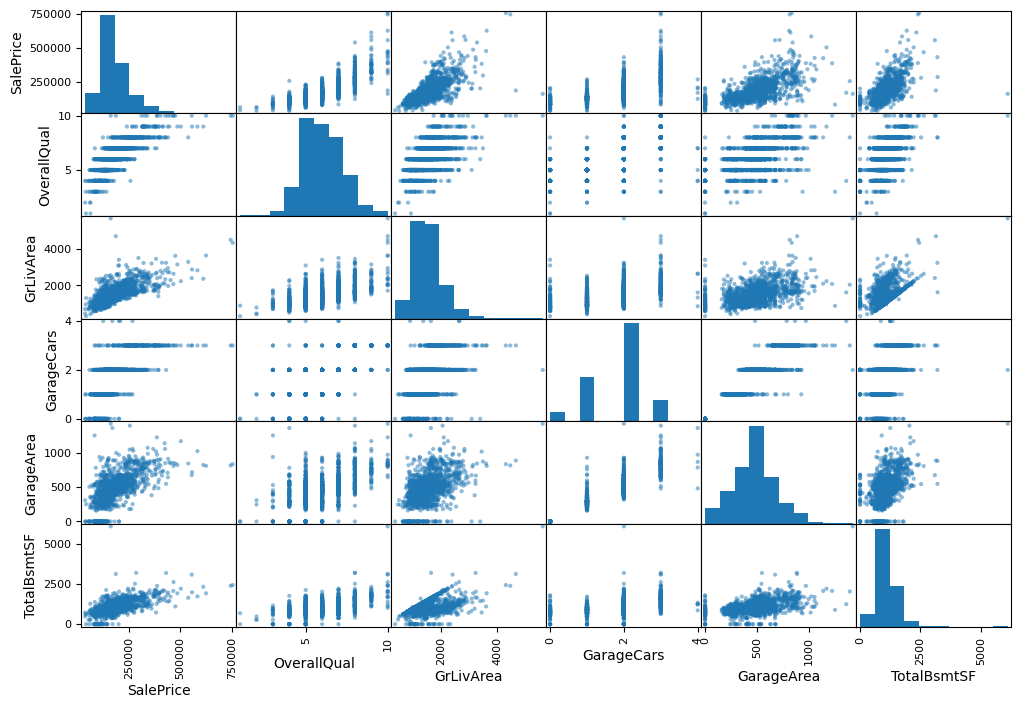

In [11]:
from pandas.plotting import scatter_matrix

categorical_columns = rawTrain.select_dtypes(exclude='number').columns.tolist()
numerical_columns = rawTrain.select_dtypes(include='number').columns.tolist()

attributes=["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF"]

#scatter_matrix(rawTrain[numerical_columns], figsize=(12,8))
scatter_matrix(rawTrain[attributes], figsize=(12,8))

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [6]:

# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(43)
trainSet, testSet= train_test_split(rawTrain, test_size=.2, random_state=43)

#trainSet, validationSet = train_test_split(preset, test_size=.2, random_state=43)

#print(trainSet.shape)
#rint(validationSet.shape)
#print(testSet.shape)

#make labels
trainSetLabels=trainSet["SalePrice"].copy()
trainSet.drop("SalePrice", axis=1)

#got the select_dtypes() method from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html




print(len(numerical_columns)+len(categorical_columns))

print(numerical_columns)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numericalPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

#tester=numericalPipeline.fit_transform(rawTrain[numerical_columns])

fullPipeline= ColumnTransformer([
    ("numerical", numericalPipeline, numerical_columns),
    ("categorical", OneHotEncoder(), categorical_columns)
])


cleanedTrainSet=fullPipeline.fit_transform(trainSet)
#cleanedValidationSet=fullPipeline.transform(validationSet)
#cleanedTestSet=fullPipeline.transform(testSet)

#make labels
#trainNoLabels=cleanedTrainSet.drop("SalePrice", axis=1)


81
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [7]:
# Try a few models here
def showScores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


#LINEAR
from sklearn.linear_model import LinearRegression

linReg=LinearRegression()

linReg.fit(cleanedTrainSet, trainSetLabels)

from sklearn.model_selection import cross_val_score

# addlinear model .fit

scores=cross_val_score(linReg, cleanedTrainSet, trainSetLabels, scoring="neg_mean_squared_error", cv=5)
linScores=np.sqrt(-scores)

print("Linear Scores: ")
showScores(linScores)


#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

regTree=DecisionTreeRegressor(random_state=43)

regTree.fit(cleanedTrainSet, trainSetLabels)

scoresTree=cross_val_score(regTree, cleanedTrainSet, trainSetLabels, scoring="neg_mean_squared_error", cv=5)
treeScores=np.sqrt(-scoresTree)
print("\n Decision Tree Scores")
showScores(treeScores)


#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

randForest=RandomForestRegressor(n_estimators=100, random_state=43)

randForest.fit(cleanedTrainSet, trainSetLabels)

scoresForest=cross_val_score(randForest, cleanedTrainSet, trainSetLabels, scoring="neg_mean_squared_error", cv=5)
forestScores=np.sqrt(-scoresForest)
print("\n Random Forest Scores")
showScores(forestScores)

Linear Scores: 
Scores: [3.20788909 2.7624482  2.57892459 3.30290907 3.90972431]
Mean: 3.152379053395319
Standard deviation: 0.46480287956183575

 Decision Tree Scores
Scores: [ 9321.27886869  2621.27353973 12735.73958856  9570.6603503
  4499.36383915]
Mean: 7749.663237285249
Standard deviation: 3674.555500374752

 Random Forest Scores
Scores: [ 3068.06251318  1345.75386223  8177.49377319 10071.58541432
  1802.40040975]
Mean: 4893.059194537243
Standard deviation: 3551.641987644496


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [8]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
"""
params={
    'n_estimators': randint(1,200),
    'max_features': randint(1,8)
}

newForestReg=RandomForestRegressor(random_state=43)

randSearch=RandomizedSearchCV(newForestReg, param_distributions=params, n_iter=40, cv=5, scoring='neg_mean_squared_error', random_state=43)
randSearch.fit(cleanedTrainSet, trainSetLabels)

randSearchScores=randSearch.cv_results_

for mean_score, params in zip(randSearchScores["mean_test_score"], randSearchScores['params']):
  print(params, ":", np.sqrt(-mean_score))

"""
"""
from sklearn.model_selection import GridSearchCV

param_grid=[
    {"n_estimators": [25, 50, 75, 100, 125, 150, 175, 200], 'max_features': [6,7,8]}
]


newForestReg=RandomForestRegressor(random_state=43)

gridSearch=GridSearchCV(newForestReg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

gridSearch.fit(cleanedTrainSet, trainSetLabels)

scores=gridSearch.cv_results_
for mean_score, params in zip(scores["mean_test_score"], scores['params']):
  print(params, ":", np.sqrt(-mean_score))

  """
{'max_features': 5, 'n_estimators': 65} : 34065.03397172893
{'max_features': 2, 'n_estimators': 22} : 37597.32952458366
{'max_features': 3, 'n_estimators': 17} : 35359.48419060888
{'max_features': 4, 'n_estimators': 146} : 33941.956343946506
{'max_features': 4, 'n_estimators': 92} : 33602.13573476353
{'max_features': 3, 'n_estimators': 111} : 35531.43100800862
{'max_features': 7, 'n_estimators': 88} : 31517.808504523528
{'max_features': 1, 'n_estimators': 36} : 38531.266653381994
{'max_features': 3, 'n_estimators': 124} : 35587.92374652157
{'max_features': 4, 'n_estimators': 90} : 33639.43060864184

{'max_features': 6, 'n_estimators': 25} : 32456.065963211226
{'max_features': 6, 'n_estimators': 50} : 33011.517864070825
{'max_features': 6, 'n_estimators': 75} : 32609.629424024813
{'max_features': 6, 'n_estimators': 100} : 32365.266798965808
{'max_features': 6, 'n_estimators': 125} : 32038.467497211077
{'max_features': 6, 'n_estimators': 150} : 31822.498214057166
{'max_features': 6, 'n_estimators': 175} : 31913.704523570228
{'max_features': 6, 'n_estimators': 200} : 31873.181196180743
{'max_features': 7, 'n_estimators': 25} : 31981.142586528094
{'max_features': 7, 'n_estimators': 50} : 31668.13552156299
{'max_features': 7, 'n_estimators': 75} : 31621.899139712237
{'max_features': 7, 'n_estimators': 100} : 31383.893857441417
{'max_features': 7, 'n_estimators': 125} : 31283.60653134657
{'max_features': 7, 'n_estimators': 150} : 31232.60117454446
{'max_features': 7, 'n_estimators': 175} : 31281.264291802043
{'max_features': 7, 'n_estimators': 200} : 31151.850540468717
{'max_features': 8, 'n_estimators': 25} : 31938.461214078387
{'max_features': 8, 'n_estimators': 50} : 32094.413036754326
{'max_features': 8, 'n_estimators': 75} : 31641.977020106136
{'max_features': 8, 'n_estimators': 100} : 31470.27983862367
{'max_features': 8, 'n_estimators': 125} : 31292.35990296956
{'max_features': 8, 'n_estimators': 150} : 31103.701059652885
{'max_features': 8, 'n_estimators': 175} : 30918.559114230677     # best
{'max_features': 8, 'n_estimators': 200} : 30989.166366687874
"""




{'max_features': 6, 'n_estimators': 25} : 32456.065963211226
{'max_features': 6, 'n_estimators': 50} : 33011.517864070825
{'max_features': 6, 'n_estimators': 75} : 32609.629424024813
{'max_features': 6, 'n_estimators': 100} : 32365.266798965808
{'max_features': 6, 'n_estimators': 125} : 32038.467497211077
{'max_features': 6, 'n_estimators': 150} : 31822.498214057166
{'max_features': 6, 'n_estimators': 175} : 31913.704523570228
{'max_features': 6, 'n_estimators': 200} : 31873.181196180743
{'max_features': 7, 'n_estimators': 25} : 31981.142586528094
{'max_features': 7, 'n_estimators': 50} : 31668.13552156299
{'max_features': 7, 'n_estimators': 75} : 31621.899139712237
{'max_features': 7, 'n_estimators': 100} : 31383.893857441417
{'max_features': 7, 'n_estimators': 125} : 31283.60653134657
{'max_features': 7, 'n_estimators': 150} : 31232.60117454446
{'max_features': 7, 'n_estimators': 175} : 31281.264291802043
{'max_features': 7, 'n_estimators': 200} : 31151.850540468717
{'max_features': 

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

In [ ]:
""""


## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!